In [4]:
## import neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
import pickle

import warnings
warnings.filterwarnings('ignore')

In [5]:
# load the dataset
df = pd.read_csv("D:\Bank_Churn_ANN\churn_data.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
## check the structure
df.shape

(10000, 14)

In [7]:
## check for column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
## check missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Exploratory Data Analysis

In [10]:
## summary statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: xlabel='Exited'>

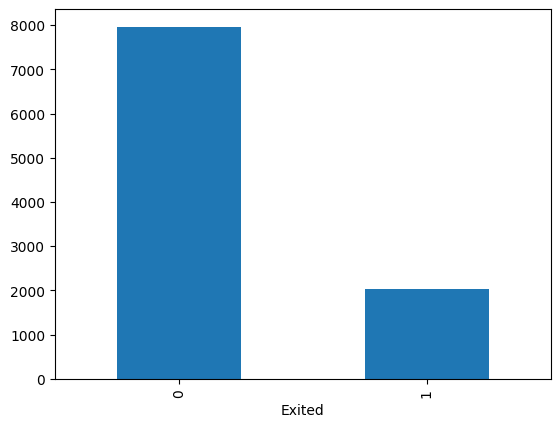

In [11]:
# Check target variable distribution
df['Exited'].value_counts(normalize=True)
df['Exited'].value_counts().plot(kind='bar')


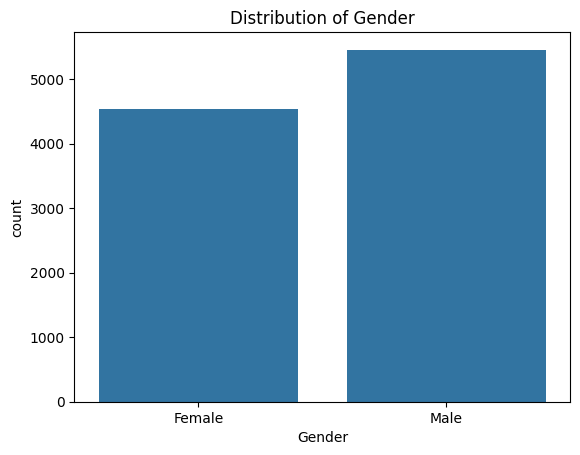

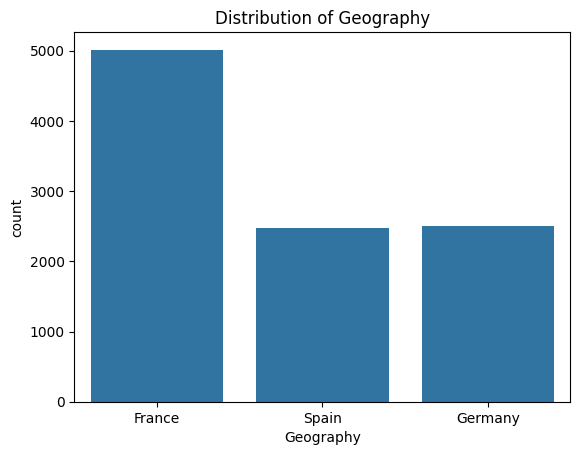

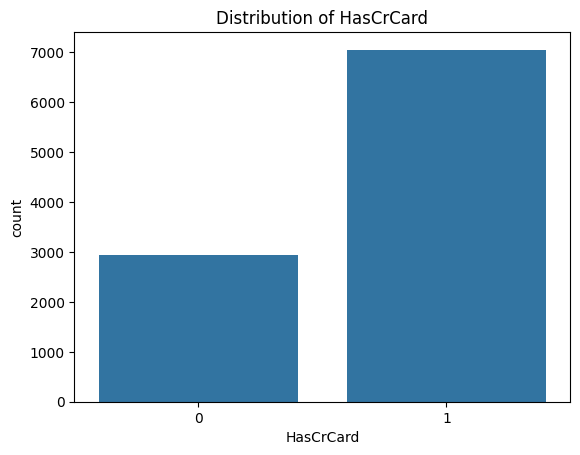

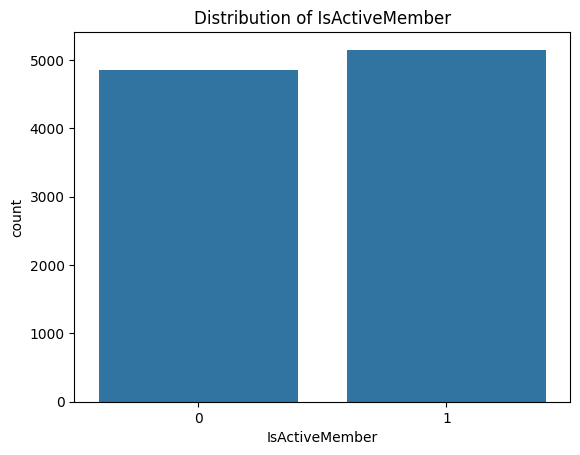

In [12]:
## visualize the distribution of categorical columns
for col in ['Gender', 'Geography', 'HasCrCard', 'IsActiveMember']:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()


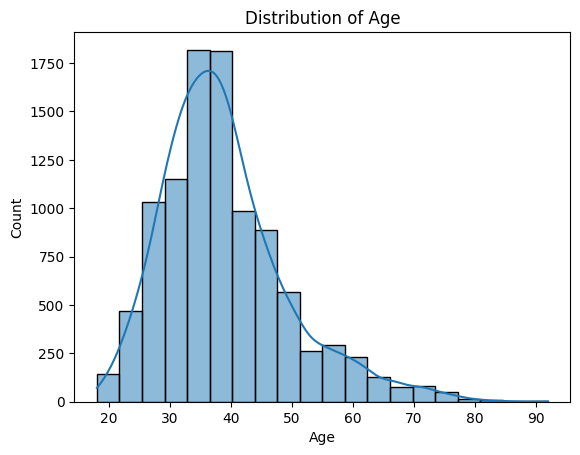

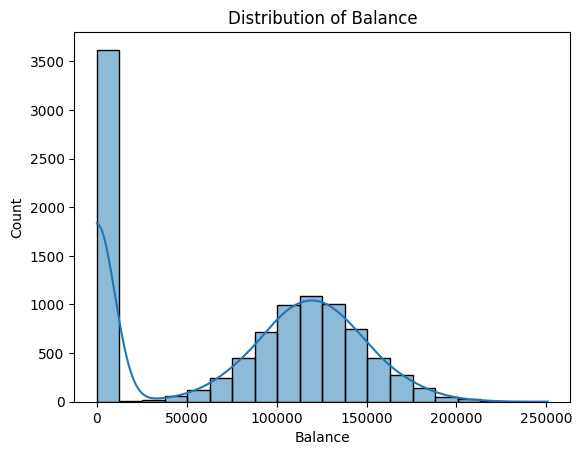

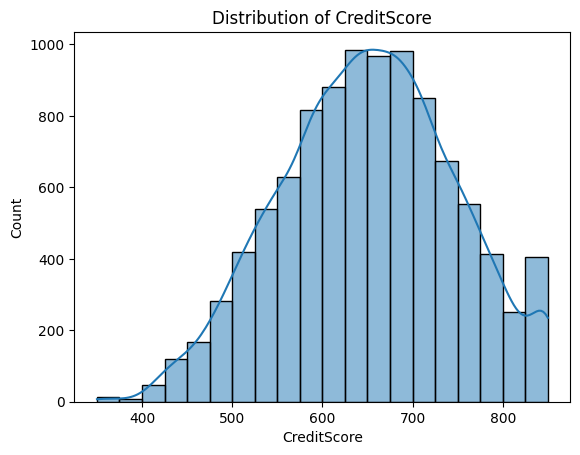

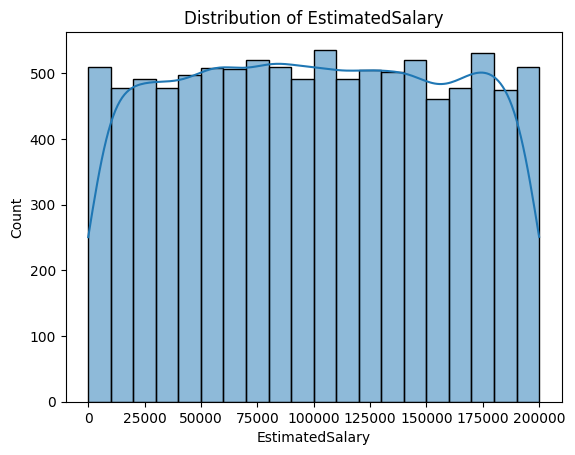

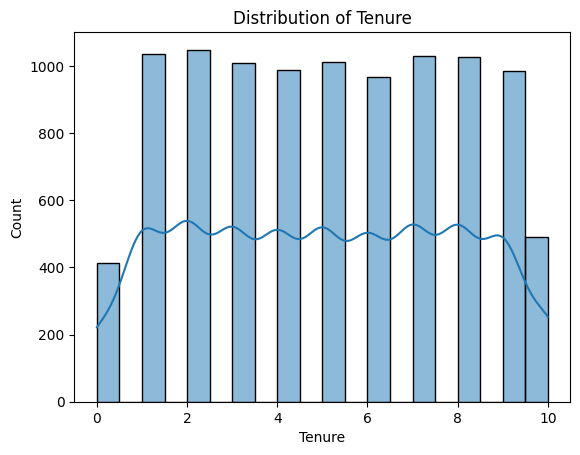

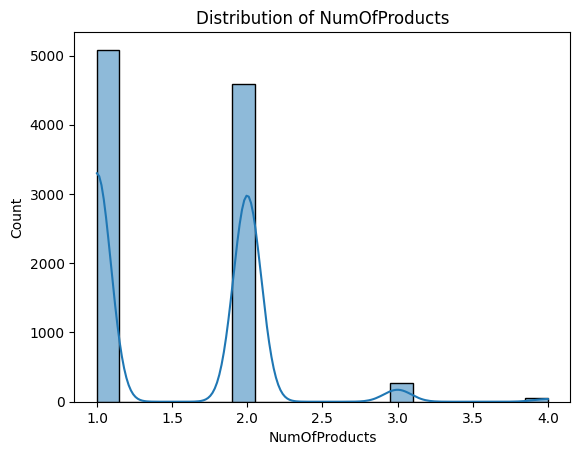

In [13]:
## visualize the distribution of numerical columns
for col in ['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'Tenure', 'NumOfProducts']:
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()


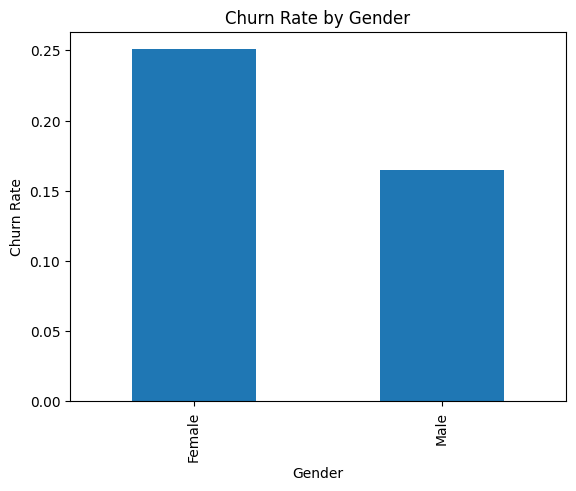

In [14]:
## plot average churn rate for gender
churn_rate = df.groupby(["Gender"])['Exited'].mean()
churn_rate.plot(kind='bar', title=f'Churn Rate by Gender')
plt.ylabel('Churn Rate')
plt.show()

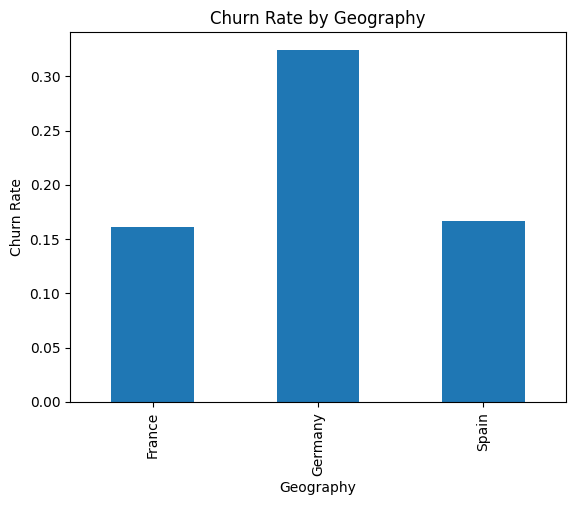

In [15]:
# churn rate across the different locations
churn_rate = df.groupby(["Geography"])['Exited'].mean()
churn_rate.plot(kind='bar', title=f'Churn Rate by Geography')
plt.ylabel('Churn Rate')
plt.show()

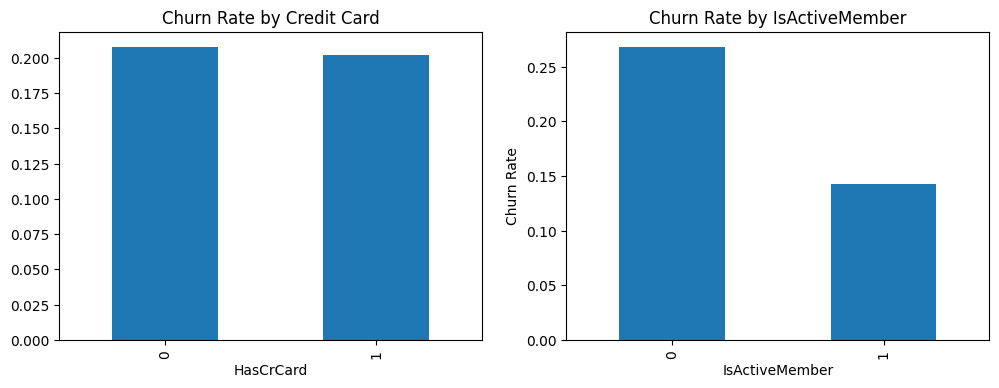

In [19]:
#plot churn rate vs hascreditcard
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
churn_rate = df.groupby(["HasCrCard"])['Exited'].mean()
churn_rate.plot(kind='bar', title=f'Churn Rate by Credit Card')
plt.subplot(1,2,2)
churn_rate = df.groupby(["IsActiveMember"])['Exited'].mean()
churn_rate.plot(kind='bar', title=f'Churn Rate by IsActiveMember')
plt.ylabel('Churn Rate')
plt.show()

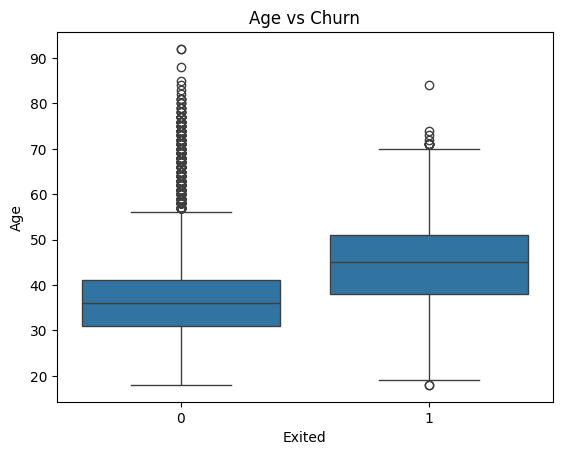

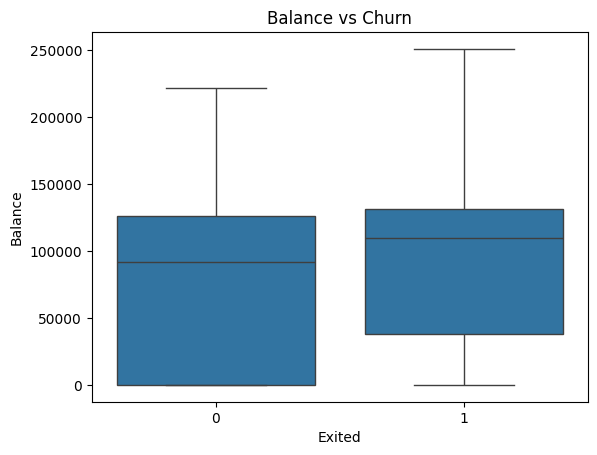

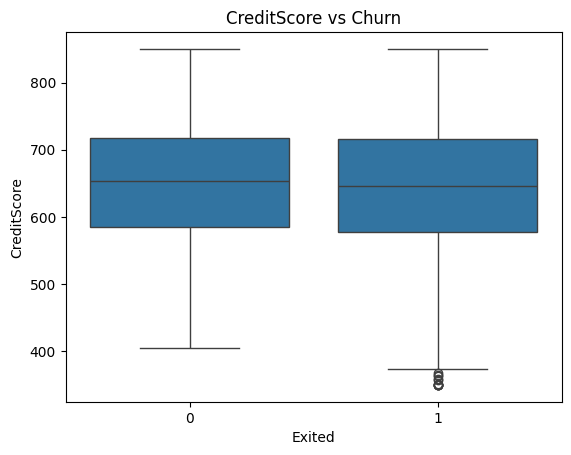

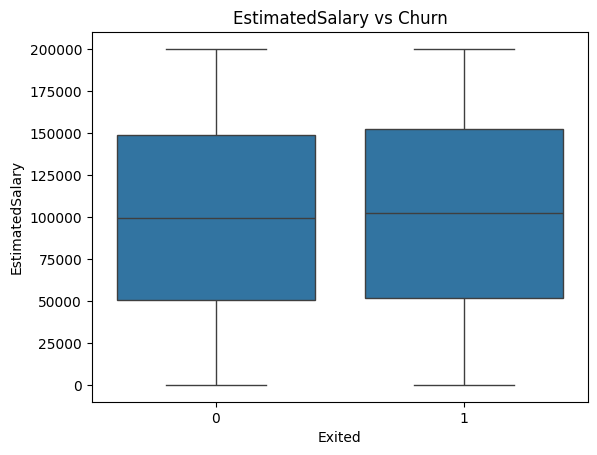

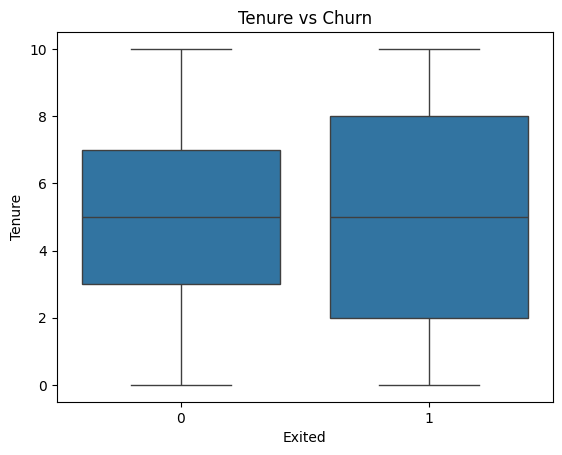

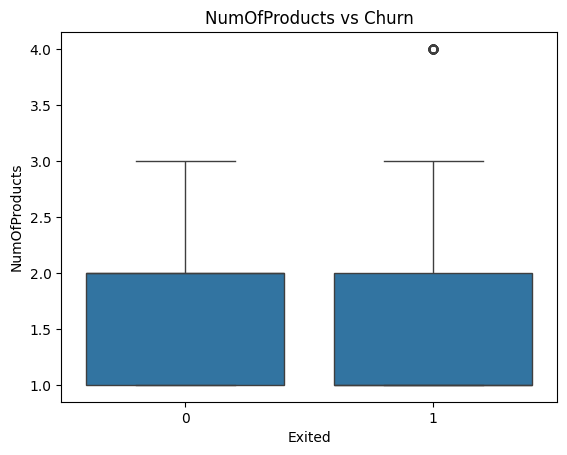

In [21]:
## check outlier in numerical columns
for col in ['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'Tenure', 'NumOfProducts']:
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()


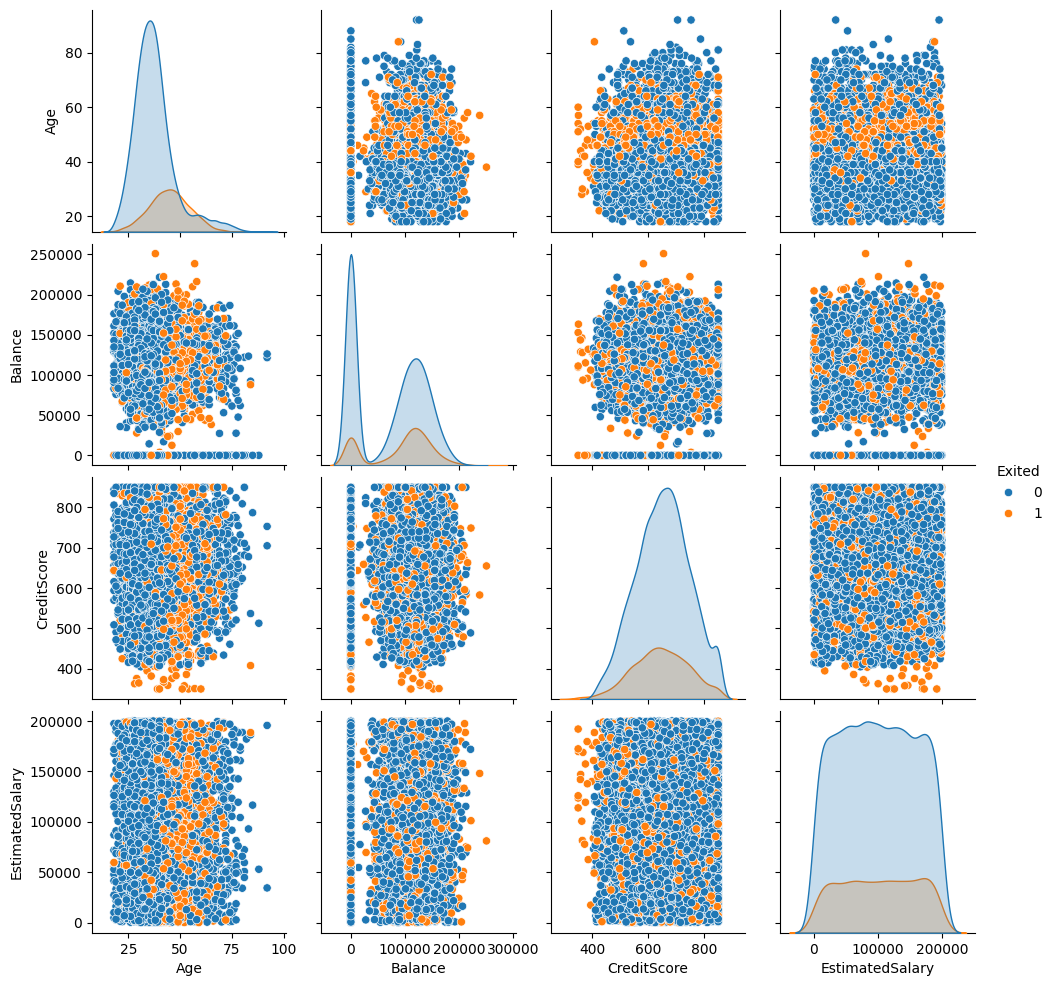

In [25]:
## plot relationship between continuout columns
numerical_cols = ['Age', 'Balance', 'CreditScore', 'EstimatedSalary']
sns.pairplot(df[numerical_cols + ['Exited']], hue='Exited')
plt.show()


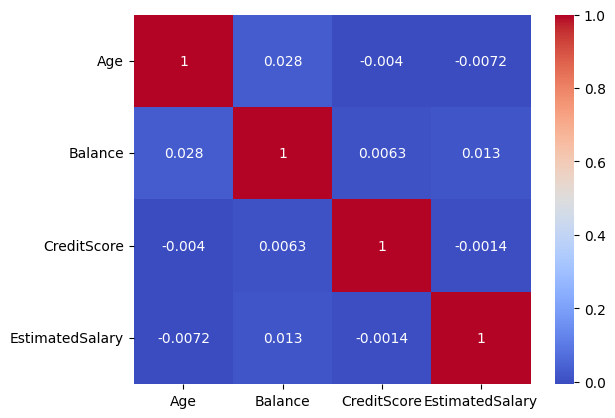

In [33]:
## plot correlation
correlation = df[['Age', 'Balance', 'CreditScore', 'EstimatedSalary']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

### Feature Engineering and Feature Selection

In [34]:
## Data Preprocessing
## Drop irrelevent columns
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
## check the unique values in geography and gender columns
print(df["Geography"].value_counts())

print('-------------------------------')

print(df["Gender"].value_counts())


Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
-------------------------------
Gender
Male      5457
Female    4543
Name: count, dtype: int64


In [36]:
## encode the Gender column using label encoder
gen_label_encoder=LabelEncoder()
df["Gender"] = gen_label_encoder.fit_transform(df["Gender"])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [37]:
## Encode the Geography column using OHE
onehot_encoder = OneHotEncoder()
geo_encoder=onehot_encoder.fit_transform(df[["Geography"]])
geo_encoder.toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [38]:
onehot_encoder.get_feature_names_out(["Geography"])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [39]:
geo_df = pd.DataFrame(geo_encoder.toarray(),columns=onehot_encoder.get_feature_names_out(["Geography"]))

In [40]:
## combine both the dataframes
data = pd.concat([df.drop(["Geography"],axis=1),geo_df],axis=1)


In [87]:
## preprocessed data
data.tail()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0
9999,792,0,28,4,130142.79,1,1,0,38190.78,0,1.0,0.0,0.0


In [90]:
data['Geography_France']=data['Geography_France'].apply(lambda x : 1 if x==1.0 else 0).astype('int')
data['Geography_Germany']=data['Geography_Germany'].apply(lambda x : 1 if x==1.0 else 0).astype('int')
data['Geography_Spain']=data['Geography_Spain'].apply(lambda x : 1 if x==1.0 else 0).astype('int')

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int32  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  int32  
 11  Geography_Germany  10000 non-null  int32  
 12  Geography_Spain    10000 non-null  int32  
dtypes: float64(2), int32(4), int64(7)
memory usage: 859.5 KB


In [93]:
## define features and target 
X=data.drop(['Exited'], axis =1)
y=data['Exited']

# Check the class distribution
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [94]:
## since data is imbalanced lets balanced the dataset using smote technique
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new classes
y_resampled.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [95]:
X_resampled.tail()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
15921,773,0,47,5,108732.431561,1,1,0,184555.335538,0,1,0
15922,465,0,56,7,127070.846317,1,1,0,51834.800300,0,1,0
15923,603,0,32,3,102755.340078,2,0,0,189755.014496,0,1,0
15924,732,0,47,5,0.000000,3,1,0,89933.242727,0,0,0
15925,706,0,31,7,0.000000,1,1,0,28675.783564,0,0,0


In [96]:
#split the data
X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=0.2,random_state=42)

## standardize the columns
columns_to_standardize = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
scaler=StandardScaler()
X_train[columns_to_standardize]=scaler.fit_transform(X_train[columns_to_standardize])
X_test[columns_to_standardize]=scaler.transform(X_test[columns_to_standardize])

In [97]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
13555,1.167118,0,0.703866,0.070412,0.445802,1,0,0,1.447669,0,0,0
1665,1.090834,1,0.103568,-1.399555,0.777747,2,0,1,0.744613,1,0,0
14878,-0.587415,1,-0.596780,-1.032063,1.042245,1,1,0,-0.774528,0,0,0
7471,0.099141,0,1.404213,1.172887,0.607548,1,0,1,0.325995,0,1,0
2582,0.077346,0,0.503766,0.070412,0.511024,2,1,1,0.663154,1,0,0


In [100]:
## save all the pickle files

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(gen_label_encoder, file)

with open('onehot_encoder.pkl', 'wb') as file:
    pickle.dump(onehot_encoder, file)

### Model Building

In [104]:
##import libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [116]:

def train_model(X_train,X_test,y_train,y_test):
    
    ## define models to train
    models = {
        "Logistic Regression": LogisticRegression(),
        "Random Forest": RandomForestClassifier(),
        "Support Vector Machine": SVC(probability=True),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "LightGBM": LGBMClassifier(),
        "CatBoost": CatBoostClassifier(verbose=0)
    }
    
    ## list to store metrics
    results = []
    
    for model_name, model in models.items():
        print(f"Training {model_name}")
        model.fit(X_train, y_train)
        ## make predictions
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        
        ## metrics
        metrics = {
            "Model": model_name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1-Score": f1_score(y_test, y_pred),
            "ROC-AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
        }
        results.append(metrics)
    
    ## convert results to a DataFrame
    global metrics_df
    metrics_df = pd.DataFrame(results)
    return metrics_df

In [117]:
train_model(X_train,X_test,y_train,y_test)

Training Logistic Regression
Training Random Forest
Training Support Vector Machine
Training K-Nearest Neighbors
Training Decision Tree
Training XGBoost
Training LightGBM
[LightGBM] [Info] Number of positive: 6410, number of negative: 6330
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 860
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503140 -> initscore=0.012559
[LightGBM] [Info] Start training from score 0.012559
Training CatBoost


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.816698,0.836225,0.775918,0.804943,0.893944
1,Random Forest,0.887947,0.889323,0.879588,0.884429,0.953716
2,Support Vector Machine,0.866918,0.887440,0.832582,0.859136,0.940594
3,K-Nearest Neighbors,0.855618,0.844360,0.862846,0.853503,0.927317
4,Decision Tree,0.837100,0.818350,0.855763,0.836638,0.837557
5,XGBoost,0.885436,0.884217,0.880232,0.882220,0.952717
6,LightGBM,0.884809,0.894807,0.865422,0.879869,0.952247
7,CatBoost,0.888889,0.897810,0.871217,0.884314,0.954539


### Model Evaluation

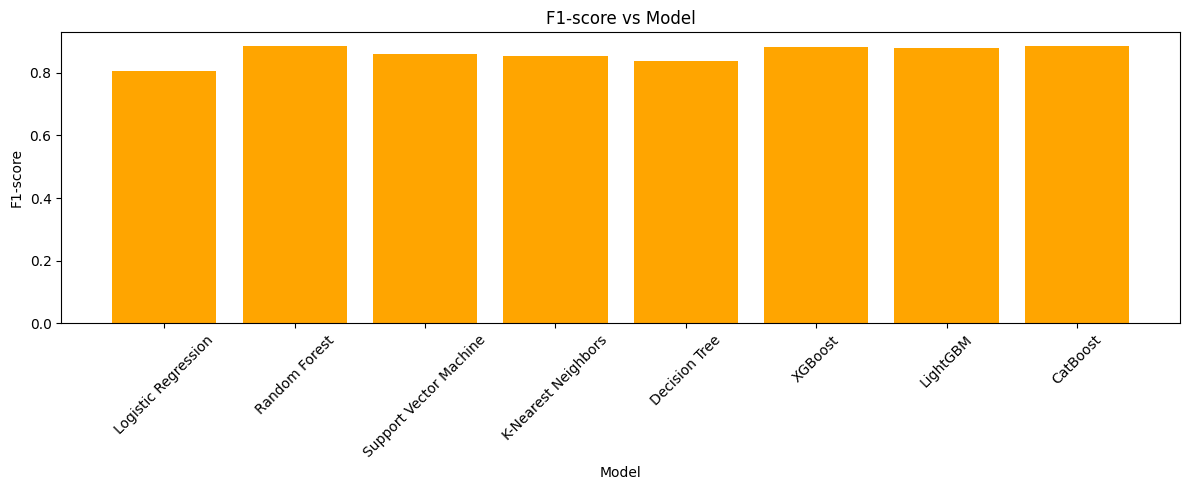

In [129]:
## plot the best model
plt.figure(figsize=(12, 5))
plt.bar(metrics_df['Model'], metrics_df['F1-Score'], color='orange')
plt.title('F1-score vs Model')
plt.xlabel('Model')
plt.ylabel('F1-score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ANN model

In [130]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime 

In [131]:
## build ANN model
model = Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),        ## hidden layer with 64 neurons
    Dense(32,activation='relu'),                                        ## hidder layer with 32 neurons
    Dense(1,activation='sigmoid')                                       ## output layer
]
)

In [132]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [133]:
## define optimizer and loss function
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss = tensorflow.keras.losses.BinaryCrossentropy()
loss

In [134]:
## compile the model
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])

In [135]:
## set up the tensorboard
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

log_dir = "log/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callbacks = TensorBoard(log_dir=log_dir,histogram_freq=1)

In [136]:
## set up early stopping
early_stopping_callback=EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [137]:
## train the model

history=model.fit(
    X_train,y_train, validation_data=(X_test,y_test), epochs=100,
    callbacks=[tensorflow_callbacks,early_stopping_callback]
)

Epoch 1/100


399/399 [==============================] - 3s 3ms/step - loss: 0.4004 - accuracy: 0.8147 - val_loss: 0.3592 - val_accuracy: 0.8393
Epoch 2/100
399/399 [==============================] - 1s 3ms/step - loss: 0.3380 - accuracy: 0.8482 - val_loss: 0.3286 - val_accuracy: 0.8556
Epoch 3/100
399/399 [==============================] - 1s 3ms/step - loss: 0.3272 - accuracy: 0.8524 - val_loss: 0.3271 - val_accuracy: 0.8537
Epoch 4/100
399/399 [==============================] - 1s 3ms/step - loss: 0.3263 - accuracy: 0.8553 - val_loss: 0.3199 - val_accuracy: 0.8600
Epoch 5/100
399/399 [==============================] - 1s 3ms/step - loss: 0.3158 - accuracy: 0.8587 - val_loss: 0.3103 - val_accuracy: 0.8663
Epoch 6/100
399/399 [==============================] - 1s 2ms/step - loss: 0.3148 - accuracy: 0.8598 - val_loss: 0.3175 - val_accuracy: 0.8534
Epoch 7/100
399/399 [==============================] - 1s 2ms/step - loss: 0.3133 - accuracy: 0.8603 - val_loss: 0.3151 - val_accuracy: 0.86

In [138]:
## save the model
model.save('model_ann.h5')

In [45]:
## load tensorboard extension
%load_ext tensorboard

In [ ]:
%tensorboard --logdir log/fit/

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

### Predictions using ANN

In [139]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import pickle

In [146]:
### Load the trained model
model=load_model('model_ann.h5')

## load the encoder and scaler
with open('onehot_encoder.pkl','rb') as file:
    onehot_encoder_geo=pickle.load(file)

with open('label_encoder.pkl', 'rb') as file:
    label_encoder_gender = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

In [142]:
# Example input data
input_data = {
    'CreditScore': 631,
    'Geography': 'France',
    'Gender': 'Female',
    'Age': 38,
    'Tenure': 2,
    'Balance': 200000,
    'NumOfProducts': 2,
    'HasCrCard': 1,
    'IsActiveMember': 0,
    'EstimatedSalary': 50000
}

In [151]:
# One-hot encode 'Geography'
geo_encoded = onehot_encoder.transform([[input_data['Geography']]]).toarray()
geo_encoded_df = pd.DataFrame(geo_encoded, columns=onehot_encoder.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0


In [152]:
## convert input data into dataframe
input_df=pd.DataFrame([input_data])
input_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,631,France,Female,38,2,200000,2,1,0,50000


In [153]:

## Encode categorical variables
input_df['Gender']=label_encoder_gender.transform(input_df['Gender'])
input_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,631,France,0,38,2,200000,2,1,0,50000


In [154]:
## concatination one hot encoded 
input_df=pd.concat([input_df.drop("Geography",axis=1),geo_encoded_df],axis=1)
input_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,631,0,38,2,200000,2,1,0,50000,1.0,0.0,0.0


In [156]:
## Scaling the input data
columns_to_standardize = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
input_df[columns_to_standardize]=scaler.transform(input_df[columns_to_standardize])
input_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.195097,0,-0.296631,-1.032063,1.921601,2,1,0,-0.880231,1.0,0.0,0.0


In [157]:
## make prediction
prediction=model.predict(input_df)
prediction
prediction_proba = prediction[0][0]
if prediction_proba > 0.5:
    print('The customer is likely to churn.')
else:
    print('The customer is not likely to churn.')

1/1 [==============================] - 0s 145ms/step
The customer is likely to churn.
